In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import style

In [2]:
df = pd.read_csv('./nfl_elo.csv')
print df.head()

         date  season  neutral playoff team1 team2  elo1_pre  elo2_pre  \
0  1920-09-26    1920        0     NaN   RII   STP  1503.947    1300.0   
1  1920-10-03    1920        0     NaN   CBD   PTQ  1504.688    1300.0   
2  1920-10-03    1920        0     NaN   BFF   WBU  1478.004    1300.0   
3  1920-10-03    1920        0     NaN   AKR   WHE  1503.420    1300.0   
4  1920-10-03    1920        0     NaN   RCH   ABU  1503.420    1300.0   

   elo_prob1  elo_prob2  elo1_post  elo2_post  score1  score2  
0   0.824651   0.175349   1516.108   1287.838      48       0  
1   0.825267   0.174733   1516.803   1287.885      48       0  
2   0.802000   0.198000   1489.757   1288.247      32       6  
3   0.824212   0.175788   1515.278   1288.142      43       0  
4   0.824212   0.175788   1510.934   1292.486      10       0  


<h2>Prediction Accuracies</h2>

In [3]:
DropList = ['date', 'team1', 'team2', 'playoff', 'neutral']
df = df.drop(DropList, axis =1)
Team1WinPred = df['elo_prob1'] > df['elo_prob2']
Team1Won = df['score1'] > df['score2']
Team2WinPred = df['elo_prob1'] < df['elo_prob2']
Team2Won = df['score1'] < df['score2']

Accuracy = len(df[(Team1WinPred & Team1Won) | (Team2WinPred & Team2Won)])*1.0 / len(df)
print 'Prediction Accuracy: ', Accuracy

Prediction Accuracy:  0.65352658212


<h2>Prediction Power per year</h2>

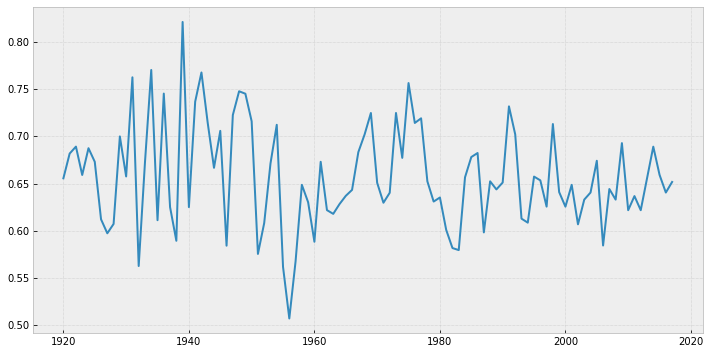

In [6]:
style.use('bmh')
PredictionRate = []
Years = list(set(df['season']))
for year in Years:
    Year = df['season'] == year
    PredictionRate.append(len(df[((Team1WinPred & Team1Won) | (Team2WinPred & Team2Won)) & Year])*1.0 / len(df[Year]))
plt.figure(figsize = (12,6))
plt.plot(Years, PredictionRate)
plt.grid(linestyle = 'dotted')
plt.savefig('pred.png')
plt.show()

<h2>A Model To Predict the Outcome of the Game Based on ELO Probabilities and Scores</h2>

In [7]:
df['Correct'] = 0 #Defining the class for correctness of predictions
df[(Team1WinPred & Team1Won) | (Team2WinPred & Team2Won)]['Correct'] = 1

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
y = df['Correct']
X = df.drop(['Correct', 'season'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [50]:
clf = LinearRegression()
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)
print 'Model Accuracy: ', Accuracy

Model Accuracy:  1.0
